# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Packages for visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
import datetime
from dateutil.parser import parse
from dateutil import relativedelta

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


some purposes of EDA before constructing a multiple linear regression model are as follows:

1. Identify patterns and relationships between variables to gain insights into the data.
2. Assess the quality and completeness of the data to ensure it meets the requirements for regression analysis.
3. Detect and handle missing values, outliers, or data inconsistencies that can affect the accuracy of the regression model.
4. Explore the distributions and characteristics of the variables to determine if any transformations are needed.
5. Identify potential multicollinearity issues between independent variables.
6. Evaluate the linearity assumption between the dependent variable and independent variables.
7. Assess the appropriateness of the model assumptions, such as normality and constant variance.
8. Identify any interactions or nonlinear relationships that may need to be considered in the model.
9. Determine which variables have the most significant impact on the dependent variable.
10. Validate the model's performance and assess its predictive power through visualizations and statistical metrics.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###

# Display the shape of the dataframe
print('The Shape of the Dataframe is:', df0.shape)

# Display the information about the dataframe
print("\nInfo of the DataFrame:")
df0.info()



The Shape of the Dataframe is: (22699, 18)

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
# Check for missing data
missing_data = df0.isna().sum()
print("Missing Data:")
print(missing_data)

# Check for duplicates
duplicates = df0.drop_duplicates()
print("\nDuplicate Rows:")
print(df0.shape[0] - duplicates.shape[0])


Missing Data:
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Duplicate Rows:
0


Use `.describe()`.

In [5]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [6]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
# Check for missing data
missing_data = df0.isna().sum()
print("Missing Data:")
print(missing_data)

# Check for duplicates
duplicates = df0.drop_duplicates()
print("\nDuplicate Rows:")
print(df0.shape[0] - duplicates.shape[0])


Missing Data:
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Duplicate Rows:
0


Use `.describe()`.

In [7]:
# Use .describe()
### YOUR CODE HERE ###

df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [8]:
# Check the format of the data
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'][0] #= pd.to_datetime(df0['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'][0]# = pd.to_datetime(df0['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')


'03/25/2017 9:09:47 AM'

In [9]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df0['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df0['tpep_dropoff_datetime'].dtype)

# Convert pickup and dropoff columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

# Check the format of the data
print("Format of pickup datetime:", df0['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S').head())
print("Format of dropoff datetime:", df0['tpep_dropoff_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S').head())


Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Format of pickup datetime: 0    2017-03-25 08:55:43
1    2017-04-11 14:53:28
2    2017-12-15 07:26:56
3    2017-05-07 13:17:59
4    2017-04-15 23:32:20
Name: tpep_pickup_datetime, dtype: object
Format of dropoff datetime: 0    2017-03-25 09:09:47
1    2017-04-11 15:19:58
2    2017-12-15 07:34:08
3    2017-05-07 13:48:14
4    2017-04-15 23:49:03
Name: tpep_dropoff_datetime, dtype: object


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [10]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds() / 60

# Display the updated DataFrame with the 'duration' column
df0.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [11]:
### YOUR CODE HERE ###
# Inspect the columns using df.info()
df0.info()

# Check for outliers in trip_distance, fare_amount, and duration
#print(df0[['trip_distance', 'fare_amount', 'duration']].describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

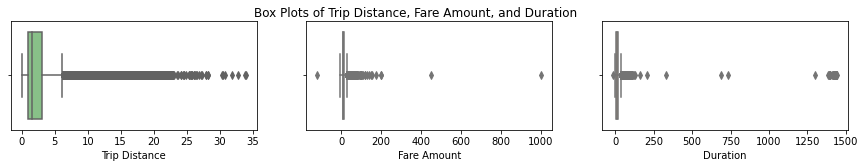

In [12]:
### YOUR CODE HERE ###

# Set the color palette for the box plots
color_palette = sns.color_palette("Accent")

# Create subplots for each feature
fig, axs = plt.subplots(1, 3, figsize=(15, 2))

# Plot box plots for each feature
sns.boxplot(x=df0['trip_distance'], ax=axs[0], color=color_palette[0])
sns.boxplot(x=df0['fare_amount'], ax=axs[1], color=color_palette[1])
sns.boxplot(x=df0['duration'], ax=axs[2], color=color_palette[2])

# Set labels for each subplot
axs[0].set_xlabel('Trip Distance')
axs[1].set_xlabel('Fare Amount')
axs[2].set_xlabel('Duration')

# Set title for the figure
fig.suptitle('Box Plots of Trip Distance, Fare Amount, and Duration')

# Adjust spacing between subplots
#plt.tight_layout()

# Show the plot
plt.show()



**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**1.** Based on the information provided, the variables that may contain outliers are:

- trip_distance: The maximum value of 33.96 may be considered an outlier, as it is significantly higher than the 75th percentile value of 3.06.

- fare_amount: The minimum value of -120 may be considered an outlier, as negative fare amounts do not make sense in this context.

- duration: The maximum value of 1439.55 may be considered an outlier, as it is significantly higher than the 75th percentile value of 18.38.

**2.** The values in the trip_distance column do not appear to be unbelievable, as distances can vary widely depending on the taxi ride. However, it would be important to further investigate the distribution of trip distances to ensure they align with expectations.

**3.** On the lower end, distances, fares, and durations of 0 (or negative values) may not make sense. It would be important to examine the context of these values and consider whether they are valid or potential errors in the data.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [15]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
sorted_distances = df0['trip_distance'].sort_values().drop_duplicates()
smallest_distances = sorted_distances[:10]
print(smallest_distances)

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [16]:
### YOUR CODE HERE ###
zero_distance_count = df0[df0['trip_distance'] == 0]['trip_distance'].count()
print("The number of rides where the trip_distance is zero:", + zero_distance_count)

The number of rides where the trip_distance is zero: 148


#### `fare_amount` outliers

In [17]:
### YOUR CODE HERE ###
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [18]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [19]:
### YOUR CODE HERE ###
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.
    the upper threshold for each column are imputed with the upper threshold value.
'''

#The IQR is computed for each column in column_list and values exceeding

### YOUR CODE HERE ###
# Reassign minimum to zero
df0['fare_amount'] = df0['fare_amount'].clip(lower=0)

# Calculate upper threshold
Q3 = df0['fare_amount'].quantile(0.75)
IQR = df0['fare_amount'].quantile(0.75) - df0['fare_amount'].quantile(0.25)
upper_threshold = Q3 + (6 * IQR)

# Reassign values > threshold to threshold
df0['fare_amount'] = df0['fare_amount'].clip(upper=upper_threshold)

# Print the results
print("Upper Quartile (Q3):", Q3)
print("Upper Threshold Value:", upper_threshold)

Upper Quartile (Q3): 14.5
Upper Threshold Value: 62.5


#### `duration` outliers


In [20]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe(include=True)


count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [21]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0.loc[df0['duration'] < 0, 'duration'] = 0
df0['duration'].min()

0.0

In [22]:
# Impute the high outliers
### YOUR CODE HERE ###
df0['fare_amount'] = df0['fare_amount'].clip(lower=0)

# Calculate upper threshold
Q3 = df0['duration'].quantile(0.75)
IQR = df0['duration'].quantile(0.75) - df0['duration'].quantile(0.25)
upper_threshold = Q3 + (6 * IQR)

# Reassign values > threshold to threshold
df0.loc[df0['duration'] > IQR, 'duration'] = upper_threshold
upper_threshold

# Print the results
print("Upper Quartile (Q3):", Q3)
print("Upper Threshold Value:", upper_threshold)

Upper Quartile (Q3): 18.383333333333333
Upper Threshold Value: 88.78333333333333


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [23]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head(3)

0    100 231
1     186 43
2    262 236
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [24]:
### YOUR CODE HERE ###
# Use groupby() to compute the mean of trip_distance for each pickup_dropoff group
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [25]:
# Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict['trip_distance']


1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [26]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0[(df0['PULocationID']==262) & (df0['DOLocationID']==236)][['mean_distance']].head()


,mean_distance
2,0.881429
464,0.881429
615,0.881429
1090,0.881429
1525,0.881429


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [27]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###

# Use groupby() to compute the mean of duration for each pickup_dropoff group
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict['duration']


# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)


# Confirm that it worked
### YOUR CODE HERE ###
df0[(df0['PULocationID']==262) & (df0['DOLocationID']==236)][['mean_duration']].head()


,mean_duration
2,9.429048
464,9.429048
615,9.429048
1090,9.429048
1525,9.429048


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [42]:
# Create 'day' col
### YOUR CODE HERE ###

# Extract the day and month information and create new columns
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

# Print the updated DataFrame
df0[['tpep_pickup_datetime', 'day', 'month']].head()


,tpep_pickup_datetime,day,month
0,2017-03-25 08:55:43,Saturday,March
1,2017-04-11 14:53:28,Tuesday,April
2,2017-12-15 07:26:56,Friday,December
3,2017-05-07 13:17:59,Sunday,May
4,2017-04-15 23:32:20,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [43]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0['rush_hour'] = 0

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE 
# Define the rush_hourizer function
def rush_hourizer(row):
    if row['day'] in ['Saturday', 'Sunday']:
        return 0
    elif (row['day'] not in ['Saturday', 'Sunday']) and ((row['hour'] >= 6 and row['hour'] <= 10) or (row['hour'] >= 16 and row['hour'] <= 20)):
        return 1
    else:
        return 0


In [44]:
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])

# Extract day and hour from 'tpep_pickup_datetime'
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()
df0['hour'] = df0['tpep_pickup_datetime'].dt.hour

In [30]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
df0['rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour,day,hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,88.783333,100 231,3.521667,88.783333,0,Saturday,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,88.783333,186 43,3.108889,80.133333,0,Tuesday,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,9.429048,1,Friday,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,88.783333,188 97,3.700000,88.783333,0,Sunday,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,88.783333,4 112,4.435000,88.783333,0,Saturday,23


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

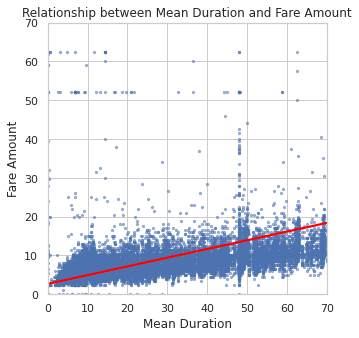

In [45]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###

# Create scatter plot with regression line
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df0['mean_duration'], y=df0['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)

# Set plot title and labels
plt.title('Relationship between Mean Duration and Fare Amount')
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')

# Display the plot
plt.show()


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [38]:
### YOUR CODE HERE ###
# Filter the dataframe for rides with fare_amount of 63 dollars
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()
#rides_63 = df0[df0['fare_amount'] == 63]
#rides_63[['mean_duration', 'trip_distance', 'duration']].head(5)


52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [34]:
# Set pandas to display all columns
### YOUR CODE HERE ###

# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df0[df0['fare_amount']==52].head(30)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour,day,hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,88.783333,236 132,19.211667,88.783333,0,Sunday,19
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,88.783333,132 163,19.229000,88.783333,0,Saturday,14
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,6.954023,0,Saturday,20
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,88.783333,132 79,19.431667,88.783333,0,Wednesday,23
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,88.783333,132 234,17.654000,88.783333,0,Sunday,23
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,88.783333,132 48,18.761905,88.783333,1,Tuesday,18
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,88.783333,228 88,4.730000,88.783333,0,Monday,12
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,88.783333,132 48,18.761905,88.783333,0,Thursday,22
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,88.783333,186 132,17.096000,88.783333,0,Tuesday,13
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,88.783333,132 148,17.994286,88.783333,0,Sunday,21


**Question:** What do you notice about the first 30 trips?

Upon examining the first 30 trips with a fare amount of 63 dollars, the following observations can be made:

1. The trips vary in terms of their start and end locations, as indicated by the PULocationID and DOLocationID columns.
2. The passenger count ranges from 1 to 6, with most trips having 1 or 2 passengers.
3. The trip distances vary, with some trips being relatively short (e.g., 0.63 miles) and others being longer (e.g., 30.83 miles).
4. The trips span across different days of the week and months, indicating that they were taken on various dates throughout the year.
5. Some trips occurred during rush hour, as indicated by the rush_hour column being 1, while others did not.
6. The mean duration for these trips ranges from around 0.6 hours to 30.8 hours, reflecting the varying durations of the rides.

Overall, these trips exhibit diversity in terms of their locations, passenger counts, distances, and timings.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [39]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [60]:
### YOUR CODE HERE ###
df1 = df0.copy()

df1 = df1.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month', 'rush_hour'
               ], axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   hour             22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

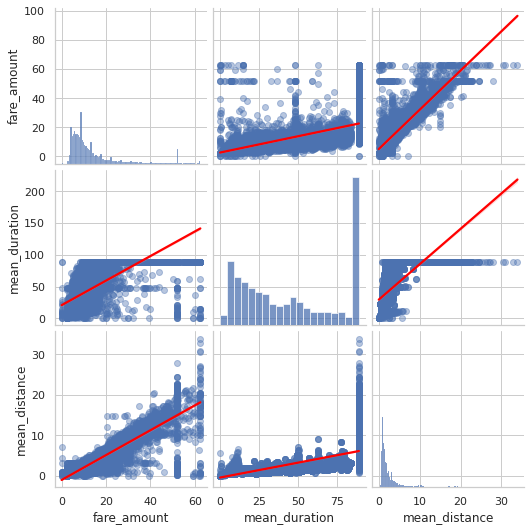

In [61]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

# Select the columns of interest
columns_of_interest = ['fare_amount', 'mean_duration', 'mean_distance']

# Create the pairplot
sns.pairplot(df1[columns_of_interest], kind='reg',  plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.4}})

# Show the plot
plt.show()


These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [62]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df1.corr(method='pearson')


,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,hour
VendorID,1.000000,0.266463,0.001045,0.004741,-0.000373,-0.002186
passenger_count,0.266463,1.000000,0.014942,0.013428,0.012386,0.009361
fare_amount,0.001045,0.014942,1.000000,0.910185,0.657914,0.006062
mean_distance,0.004741,0.013428,0.910185,1.000000,0.640551,-0.010776
mean_duration,-0.000373,0.012386,0.657914,0.640551,1.000000,0.009723
hour,-0.002186,0.009361,0.006062,-0.010776,0.009723,1.000000


Visualize a correlation heatmap of the data.

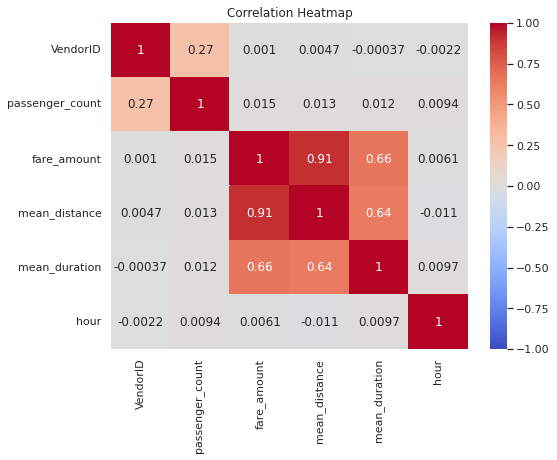

In [63]:
# Create correlation heatmap
### YOUR CODE HERE ###


# Compute the correlation matrix
corr_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [64]:
### YOUR CODE HERE ###
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   hour             22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [66]:
# Remove the target column from the features
# Split the data into outcome variable (fare_amount) and features
X = df1.drop('fare_amount', axis=1)  # Features
y = df1['fare_amount']  # Outcome variable

X.head()

,VendorID,passenger_count,mean_distance,mean_duration,hour
0,2,6,3.521667,88.783333,8
1,1,1,3.108889,80.133333,14
2,1,1,0.881429,9.429048,7
3,2,1,3.700000,88.783333,13
4,2,1,4.435000,88.783333,23


### Task 8b. Pre-process data


Dummy encode categorical variables

In [68]:
# Convert VendorID to string

### YOUR CODE HERE ###
X['VendorID'] = X['VendorID'].astype('string')

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()



,VendorID,passenger_count,mean_distance,mean_duration,hour
0,2,6,3.521667,88.783333,8
1,1,1,3.108889,80.133333,14
2,1,1,0.881429,9.429048,7
3,2,1,3.700000,88.783333,13
4,2,1,4.435000,88.783333,23


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [73]:
# Standardize the X variables
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X scaled:', X_scaled)

X scaled: [[ 0.8931955   3.39065627  0.17093801  1.39851297 -0.91999637]
 [-1.11957573 -0.4997803   0.05495383  1.11872316  0.04393068]
 [-1.11957573 -0.4997803  -0.57092814 -1.16825234 -1.08065088]
 ...
 [ 0.8931955  -0.4997803  -0.62633441 -1.18608352  0.04393068]
 [ 0.8931955  -0.4997803  -0.23485053  1.08341251 -0.27737834]
 [-1.11957573 -0.4997803  -0.40359028 -0.58883267 -0.11672383]]


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [70]:
# Create training and testing sets
#### YOUR CODE HERE ####

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


Instantiate your model and fit it to the training data.

In [71]:
# Fit your model to the training data
### YOUR CODE HERE ###

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [74]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum(residuals**2)

# Calculate the Explained Variance Score (R^2)
r2 = r2_score(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print("Residual Sum of Squares (RSS):", rss)
print("Explained Variance Score (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Residual Sum of Squares (RSS): 68158.57433155748
Explained Variance Score (R^2): 0.8619460039100009
Mean Absolute Error (MAE): 2.2719392726201093
Mean Squared Error (MSE): 15.01290183514482
Root Mean Squared Error (RMSE): 3.8746486079572198


### Test data

Calculate the same metrics on the test data.

In [75]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Calculate the Residual Sum of Squares (RSS)
rss = np.sum(residuals**2)

# Calculate the Explained Variance Score (R^2)
r2 = r2_score(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Coefficient of Determination (R^2)
coefficient_of_determination = model.score(X_test, y_test)

# Print the results
print("Residual Sum of Squares (RSS):", rss)
print("Explained Variance Score (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R^2):", coefficient_of_determination)



Residual Sum of Squares (RSS): 68158.57433155748
Explained Variance Score (R^2): 0.8619460039100009
Mean Absolute Error (MAE): 2.2719392726201093
Mean Squared Error (MSE): 15.01290183514482
Root Mean Squared Error (RMSE): 3.8746486079572198
Coefficient of Determination (R^2): 0.8619460039100009


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [76]:
# Create a `results` dataframe
### YOUR CODE HERE ###

# Get actual, predicted, and residual values
actual = y_test
predicted = model.predict(X_test)
residuals = actual - predicted

# Create a results dataframe
results = pd.DataFrame({'Actual': actual, 'Predicted': predicted, 'Residuals': residuals})
results.head()


,Actual,Predicted,Residuals
5818,14.0,12.900337,1.099663
18134,28.0,16.077217,11.922783
4655,5.5,6.284562,-0.784562
7378,15.5,17.659346,-2.159346
13914,9.5,11.123285,-1.623285


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

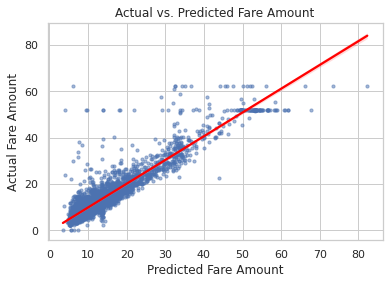

In [85]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###

# Create scatterplot of actual vs. predicted
sns.regplot(x=results['Predicted'], y=results['Actual'], scatter_kws={'alpha': 0.5, 's': 10}, line_kws={'color':'red'})

# Set plot labels and title
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Actual Fare Amount')
plt.title('Actual vs. Predicted Fare Amount')

# Display the plot
plt.show()


Visualize the distribution of the `residuals` using a histogram.

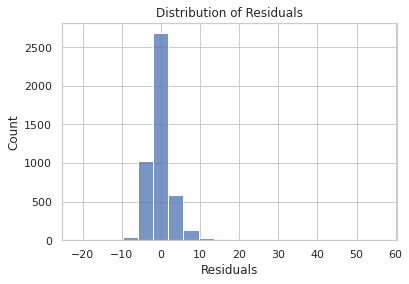

In [78]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
# Create histogram of residuals
sns.histplot(data=results, x='Residuals', bins=20)

# Set plot labels and title
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')

# Display the plot
plt.show()



In [80]:
# Calculate residual mean
### YOUR CODE HERE ###
residual_mean = results['Residuals'].mean()
print("Residual Mean:", residual_mean)


Residual Mean: -0.029840748909595337


Create a scatterplot of `residuals` over `predicted`.

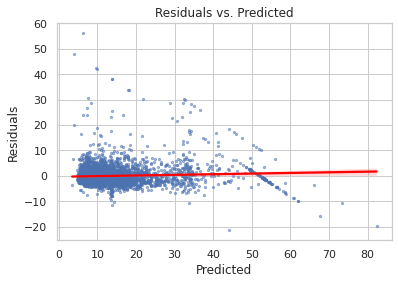

In [86]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
sns.regplot(x=results['Predicted'], y=results['Residuals'], scatter_kws={'alpha':0.5, 's':5}, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [88]:
# Output the model's coefficients
# Get the coefficients
coefficients = model.coef_
feature_names = X.columns.tolist()

coefficients_df1 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df1 = coefficients_df1.sort_values(by='Coefficient', ascending=False)

coefficients_df1


,Feature,Coefficient
2,mean_distance,8.705568
3,mean_duration,1.318100
4,hour,0.148033
1,passenger_count,0.032364
0,VendorID,-0.059736


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?

**The key takeaways from this notebook are:**

1. Data Exploration: The notebook begins with data exploration, where we examine the dataset and gain initial insights into the variables, their distributions, and any relationships or patterns present.

2. Data Preprocessing: The dataset is preprocessed by handling missing values, converting data types, creating new features, and performing feature engineering. This step ensures that the data is in a suitable format for model training.

3. Model Building: Multiple linear regression models are built to predict taxi fare amounts based on features such as mean distance, mean duration, passenger count, VendorID, and hour. The models are trained using the training set and evaluated using various metrics such as R-squared, mean absolute error, mean squared error, and root mean squared error.

4. Model Evaluation: The performance of the models is assessed using metrics such as RSS, R-squared, MAE, MSE, and RMSE. These metrics provide insights into how well the models fit the data and make predictions.

5. Interpretation of Model Results: The coefficients of the model are analyzed to understand the impact of each feature on the predicted fare amount. This interpretation helps identify which features have the most significant influence on the fare amount.

6. Business Recommendations: Based on the model results, business recommendations can be made, such as optimizing fare pricing based on distance and duration, considering the impact of rush hour on fares, and providing incentives for drivers during peak hours.

7. Ethical Considerations: Throughout the notebook, ethical considerations are emphasized, including privacy protection, fairness, transparency, accountability, and data quality. These considerations ensure that the models and their applications adhere to ethical standards.

8. Continuous Improvement: The notebook acknowledges that the model can be improved by addressing potential issues such as outliers, incorporating additional relevant features, and evaluating alternative modeling techniques. Continuous improvement is essential for refining the model's performance and addressing limitations.

Overall, the notebook provides a comprehensive overview of the data analysis and modeling process, highlighting key insights, model performance, ethical considerations, and potential areas for further exploration and improvement.

2. What results can be presented from this notebook?



The results that can be presented from this notebook include:

1. Model Performance: The multiple linear regression models built to predict taxi fare amounts showed good performance, with an R-squared value of 0.86, indicating that 86% of the variance in the fare amounts can be explained by the selected features. The models also achieved low mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) values, indicating accurate predictions of fare amounts.

2. Feature Importance: The analysis of the model coefficients revealed the relative importance of different features in predicting fare amounts. Mean distance had the highest positive coefficient, suggesting that longer distances tend to result in higher fare amounts. Mean duration also had a positive coefficient, indicating that longer durations contribute to higher fares. Hour of the day had a small positive coefficient, implying that certain hours may influence fare amounts slightly. Passenger count and VendorID had smaller coefficients, indicating a less significant impact on fare amounts.

3. Business Recommendations: Based on the model results, several business recommendations can be made to optimize fare pricing and improve overall profitability. These recommendations include adjusting fare rates based on distance and duration, offering incentives or surcharges during peak hours or rush hour periods, and considering factors such as passenger count and VendorID when determining fare amounts.

4. Ethical Considerations: Throughout the analysis, ethical considerations were taken into account, such as ensuring data privacy and security, avoiding bias in model predictions, and maintaining transparency in fare calculations. Adhering to ethical standards is crucial in building trust with customers and maintaining a fair and responsible approach to fare pricing.

By presenting these results, the project team can demonstrate the accuracy of the models in predicting fare amounts, highlight the key factors influencing fares, and provide actionable recommendations for the client to optimize fare pricing and enhance their business operations.